In [1]:
import models
import model_setup
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms
import seaborn as sns
import scipy.stats as stats

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

Processing Data:   0%|          | 20/30000 [00:00<02:30, 198.91image/s]

Processing Data: 100%|██████████| 30000/30000 [03:52<00:00, 129.18image/s]


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.GaussianBlur(kernel_size=3),
    transforms.RandomGrayscale(p=0.1),
    transforms.RandomPosterize(bits=4, p=0.1),
    transforms.RandomSolarize(threshold=128, p=0.1),
    transforms.RandomEqualize(p=0.1),
    transforms.ToTensor()
    # Add any additional preprocessing steps here
])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input*255) / 255
    # new_input.show()
    # break
    train_subset.dataset.data[idx] = (new_input, label)
    



  0%|          | 0/21000 [00:00<?, ?it/s]

100%|██████████| 21000/21000 [08:04<00:00, 43.35it/s] 


In [5]:
train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [6]:
param_grid = {
    'filters': [64, 128],
    'num_conv_layers': [4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(64, 4), (64, 8), (128, 4), (128, 8)]

Train all combinations

In [7]:
saved_models = []

model = models.OccModel()
training_info = model.train_model(train, test, epochs=50, early_stopping_patience=10)
torch.save(model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
saved_models.append(model)

Epoch 1/50 (Training): 100%|██████████| 329/329 [02:59<00:00,  1.83it/s]


Loss: 0.009204, Mean Absolute Error: 0.08696908911967531, Time remaining: 2:48:22.002239


Epoch 2/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.001305, Mean Absolute Error: 0.0763696127749504, Time remaining: 2:29:44.667408


Epoch 3/50 (Training): 100%|██████████| 329/329 [02:13<00:00,  2.46it/s]


Loss: 0.001045, Mean Absolute Error: 0.07271373838661833, Time remaining: 2:19:02.515275


Epoch 4/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.74it/s]


Loss: 0.000879, Mean Absolute Error: 0.07048502003655155, Time remaining: 2:22:58.068914


Epoch 5/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.000744, Mean Absolute Error: 0.06911363240648458, Time remaining: 2:15:30.040830


Epoch 6/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.000622, Mean Absolute Error: 0.06735329971985614, Time remaining: 2:10:18.135380


Epoch 7/50 (Training): 100%|██████████| 329/329 [02:12<00:00,  2.49it/s]


Loss: 0.000523, Mean Absolute Error: 0.06894754360806435, Time remaining: 2:05:15.699014


Epoch 8/50 (Training): 100%|██████████| 329/329 [02:16<00:00,  2.41it/s]


Loss: 0.000470, Mean Absolute Error: 0.06330206968445093, Time remaining: 2:02:09.494466


Epoch 9/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.000444, Mean Absolute Error: 0.06760760894084865, Time remaining: 2:02:50.035606


Epoch 10/50 (Training): 100%|██████████| 329/329 [02:12<00:00,  2.48it/s]


Loss: 0.000489, Mean Absolute Error: 0.06291610923932588, Time remaining: 1:58:37.045200


Epoch 11/50 (Training): 100%|██████████| 329/329 [02:14<00:00,  2.44it/s]


Loss: 0.000424, Mean Absolute Error: 0.06237681360637888, Time remaining: 1:54:57.244068


Epoch 12/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.75it/s]


Loss: 0.000419, Mean Absolute Error: 0.06495658345916804, Time remaining: 1:54:21.052798


Epoch 13/50 (Training): 100%|██████████| 329/329 [02:14<00:00,  2.45it/s]


Loss: 0.000404, Mean Absolute Error: 0.06057249552550468, Time remaining: 1:50:26.763640


Epoch 14/50 (Training): 100%|██████████| 329/329 [03:06<00:00,  1.76it/s]


Loss: 0.000417, Mean Absolute Error: 0.06331228250835805, Time remaining: 1:49:06.441744


Epoch 15/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.000502, Mean Absolute Error: 0.0617229122311828, Time remaining: 1:45:08.907465


Epoch 16/50 (Training): 100%|██████████| 329/329 [02:12<00:00,  2.49it/s]


Loss: 0.000385, Mean Absolute Error: 0.0608221274661891, Time remaining: 1:41:22.898078


Epoch 17/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.000425, Mean Absolute Error: 0.05831342111242578, Time remaining: 1:37:56.975016


Epoch 18/50 (Training): 100%|██████████| 329/329 [02:16<00:00,  2.41it/s]


Loss: 0.000350, Mean Absolute Error: 0.060726192205193194, Time remaining: 1:34:31.693664


Epoch 19/50 (Training): 100%|██████████| 329/329 [03:07<00:00,  1.75it/s]


Loss: 0.000376, Mean Absolute Error: 0.058794135980783625, Time remaining: 1:32:47.679267


Epoch 20/50 (Training): 100%|██████████| 329/329 [02:16<00:00,  2.42it/s]


Loss: 0.000465, Mean Absolute Error: 0.06039019150936857, Time remaining: 1:29:26.377920


Epoch 21/50 (Training): 100%|██████████| 329/329 [02:17<00:00,  2.40it/s]


Loss: 0.000339, Mean Absolute Error: 0.056772361529317306, Time remaining: 1:25:58.747302


Epoch 22/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.000302, Mean Absolute Error: 0.05966478029384892, Time remaining: 1:22:34.624500


Epoch 23/50 (Training): 100%|██████████| 329/329 [02:12<00:00,  2.49it/s]


Loss: 0.000344, Mean Absolute Error: 0.06047755691837123, Time remaining: 1:19:17.543829


Epoch 24/50 (Training): 100%|██████████| 329/329 [03:07<00:00,  1.75it/s]


Loss: 0.000340, Mean Absolute Error: 0.05736430284586993, Time remaining: 1:17:02.978282


Epoch 25/50 (Training): 100%|██████████| 329/329 [02:15<00:00,  2.43it/s]


Loss: 0.000329, Mean Absolute Error: 0.05725382898557693, Time remaining: 1:13:47.227775


Epoch 26/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.000211, Mean Absolute Error: 0.051763650644174285, Time remaining: 1:10:30.346128


Epoch 27/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.000130, Mean Absolute Error: 0.05298667345592316, Time remaining: 1:07:17.570420


Epoch 28/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.000101, Mean Absolute Error: 0.05162417942142867, Time remaining: 1:04:09.576786


Epoch 29/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.000085, Mean Absolute Error: 0.05103796762117046, Time remaining: 1:01:49.689648


Epoch 30/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.000088, Mean Absolute Error: 0.053253671927179426, Time remaining: 0:58:41.219300


Epoch 31/50 (Training): 100%|██████████| 329/329 [02:12<00:00,  2.49it/s]


Loss: 0.000238, Mean Absolute Error: 0.05817259673742538, Time remaining: 0:55:36.444536


Epoch 32/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.75it/s]


Loss: 0.000293, Mean Absolute Error: 0.05593948395169796, Time remaining: 0:53:05.311104


Epoch 33/50 (Training): 100%|██████████| 329/329 [02:13<00:00,  2.46it/s]


Loss: 0.000143, Mean Absolute Error: 0.05168818420869239, Time remaining: 0:50:01.150505


Epoch 34/50 (Training): 100%|██████████| 329/329 [03:07<00:00,  1.75it/s]


Loss: 0.000087, Mean Absolute Error: 0.05128547045937244, Time remaining: 0:47:25.585968


Epoch 35/50 (Training): 100%|██████████| 329/329 [03:07<00:00,  1.75it/s]


Loss: 0.000072, Mean Absolute Error: 0.05078993337427048, Time remaining: 0:44:46.099530


Epoch 36/50 (Training): 100%|██████████| 329/329 [03:12<00:00,  1.71it/s]


Loss: 0.000060, Mean Absolute Error: 0.050907776334342805, Time remaining: 0:42:04.753742


Epoch 37/50 (Training): 100%|██████████| 329/329 [03:13<00:00,  1.70it/s]


Loss: 0.000056, Mean Absolute Error: 0.051197164374938674, Time remaining: 0:39:17.730869


Epoch 38/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.49it/s]


Loss: 0.000055, Mean Absolute Error: 0.050927717932202715, Time remaining: 0:36:08.213292
Early stopping at epoch 38 due to no improvement in validation loss.
Best Validation Loss: 0.0001 at epoch 28


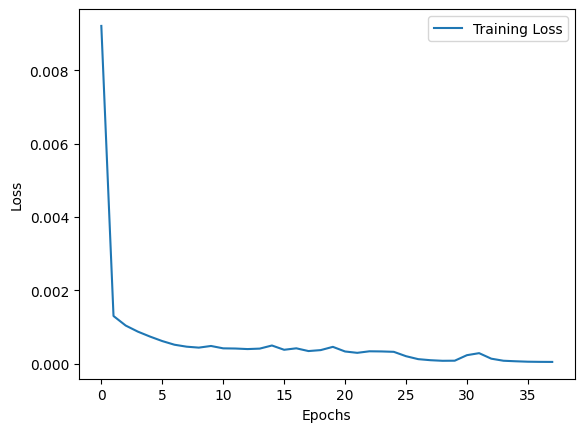

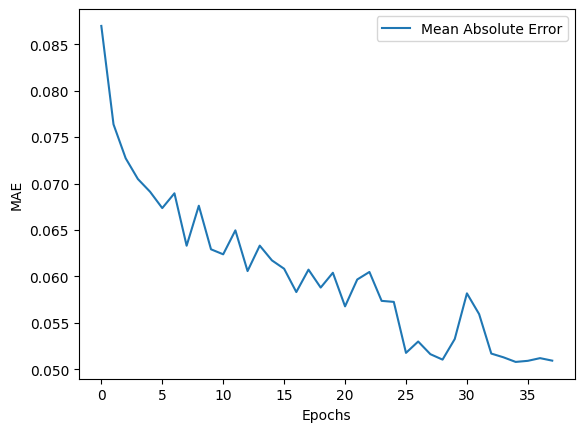

In [8]:
# Plot loss and root mean square error
# Plot training loss
plt.plot(training_info['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(training_info['mae'], label='Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Validation

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:19<00:00,  4.84it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.03748815134167671, 0.07253525406122208, 0.08614973723888397, 0.03660845756530762, 0.12518636882305145, 0.04252023622393608, 0.05826404690742493, 0.04962814226746559, 0.05837985873222351, 0.06709473580121994, 0.0355638712644577, 0.06067018583416939, 0.09303517639636993, 0.09986000508069992, 0.04742363095283508, 0.08698617666959763, 0.03715834394097328, 0.08217979967594147, 0.06711547821760178, 0.03540504351258278, 0.05901467800140381, 0.11859820038080215, 0.11995957046747208, 0.04103005677461624, 0.0331854484975338, 0.09005245566368103, 0.05147863179445267, 0.04277796670794487, 0.03247229382395744, 0.05241404101252556, 0.05860390141606331, 0.09961255639791489, 0.05795751139521599, 0.09646087884902954, 0.0455394871532917, 0.08672972768545151, 0.07722955197095871, 0.07082982361316681, 0.07633748650550842, 0.0990883931517601, 0.051471590995788574, 0.14843955636024475, 0.04727121815085411, 0.062040314078330994, 0.047656480222940445, 0.022558242082595825, 0.06262467056512833, 0.1059082373

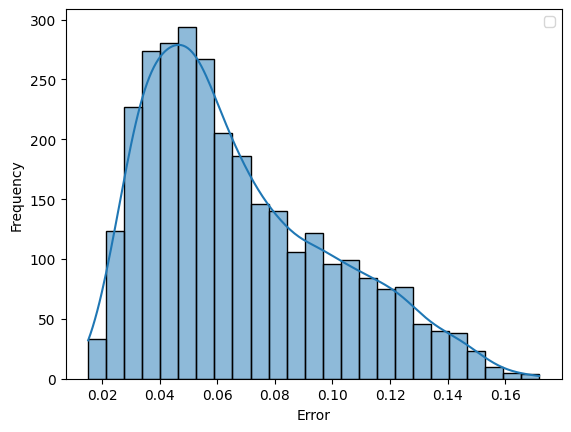

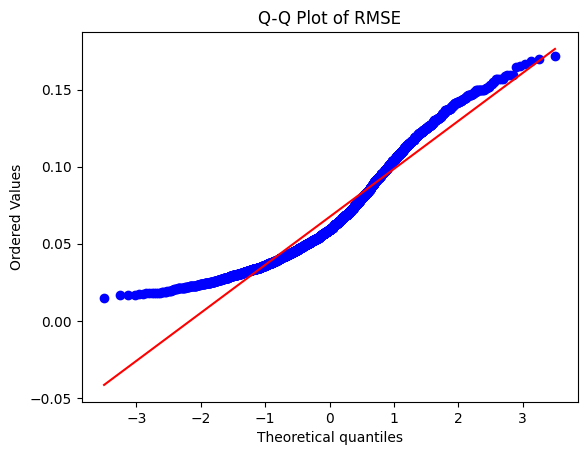

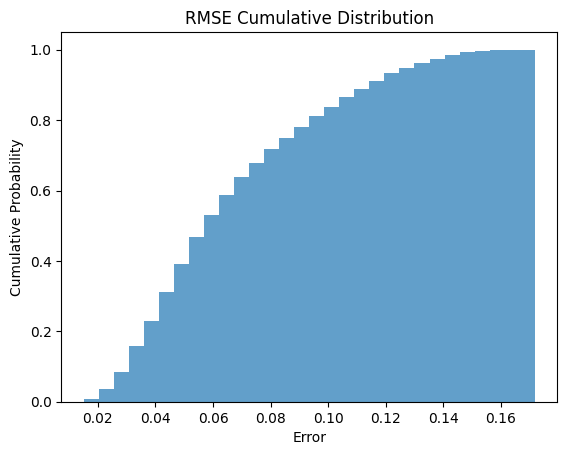

(3000, 21, 3)


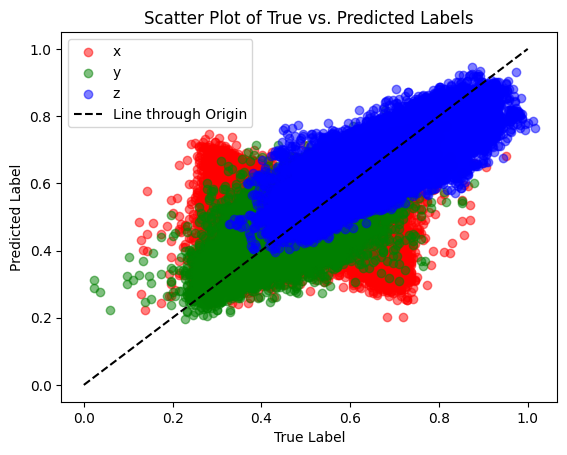

In [9]:
for idx, model in enumerate(saved_models):
    true_labels = []
    predicted_labels = []
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")

    # Set the model to evaluation mode
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rmse_list = []
    # Loop through the validation dataloader
    with torch.no_grad():
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())
            predicted_labels.extend(outputs.tolist())
            for output, label in zip(outputs, labels.to(device)):
                mse = nn.MSELoss()(output, label)
                rmse = torch.sqrt(mse)
                rmse_list.append(float(rmse))

    print(rmse_list)

    sns.histplot(rmse_list, kde=True)
    # plt.hist(rmse_list, kde=True)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    

    stats.probplot(rmse_list, dist="norm", plot=plt)
    plt.title("Q-Q Plot of RMSE")
    plt.show()
    
    plt.hist(rmse_list, cumulative=True, density=True, bins=30, alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Cumulative Probability')
    plt.title(f'RMSE Cumulative Distribution')
    plt.show()
    import numpy as np
    print(np.array(true_labels).shape)
    true_array = np.array(true_labels)
    pred_array = np.array(predicted_labels)
    plt.scatter(true_array[:, :, 0], pred_array[:, :, 0], alpha=0.5, c='r', label="x")
    plt.scatter(true_array[:, :, 1], pred_array[:, :, 1], alpha=0.5, c='g', label="y")
    plt.scatter(true_array[:, :, 2], pred_array[:, :, 2], alpha=0.5, c='b', label="z")
    line_x = np.linspace(0, 1, 100)
    line_y = line_x  # y = x for the line going through the origin

    plt.plot(line_x, line_y, color='black', linestyle='--', label='Line through Origin')
    plt.legend()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Scatter Plot of True vs. Predicted Labels')
    plt.show()

In [10]:
# from PIL import Image
# from os import listdir
# import torch.nn.functional as F

# image_head = "../images/"
# paths = listdir(image_head)

# transform = transforms.Compose({
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# })

# for path in paths:
#     image = Image.open(image_head+path)
#     image = transform(image) / 255
#     output = model(torch.stack([image]).to(device))
#     print(torch.argmax(output),F.softmax(output, dim=1).tolist())

In [11]:
old_model = model

tensor([[0.3357, 0.5646, 0.7059],
        [0.3800, 0.5787, 0.6894],
        [0.4013, 0.5816, 0.6678],
        [0.4366, 0.5795, 0.6606],
        [0.4838, 0.5753, 0.6425],
        [0.4797, 0.5135, 0.6503],
        [0.5424, 0.4886, 0.6356],
        [0.5836, 0.4811, 0.6280],
        [0.6407, 0.4556, 0.6185],
        [0.5141, 0.4895, 0.6462],
        [0.5843, 0.4580, 0.6321],
        [0.6356, 0.4359, 0.6254],
        [0.6879, 0.3944, 0.6199],
        [0.5261, 0.4875, 0.6599],
        [0.5801, 0.4634, 0.6459],
        [0.6258, 0.4277, 0.6412],
        [0.6716, 0.3959, 0.6379],
        [0.5203, 0.4933, 0.6709],
        [0.5591, 0.4721, 0.6619],
        [0.6021, 0.4512, 0.6597],
        [0.6399, 0.4236, 0.6525]], device='cuda:0', grad_fn=<SelectBackward0>)


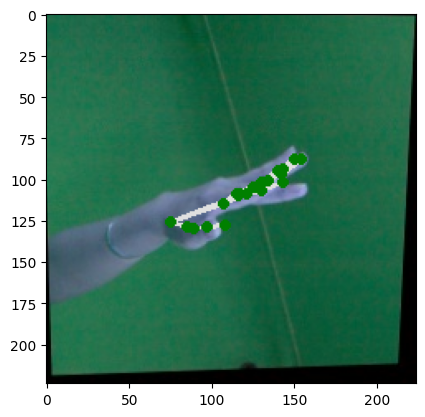

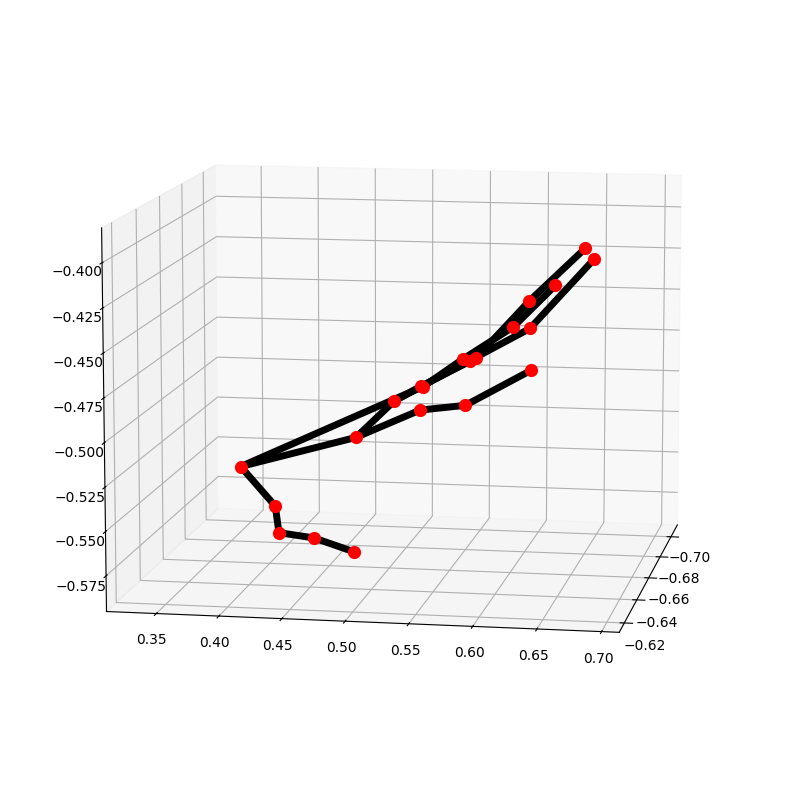

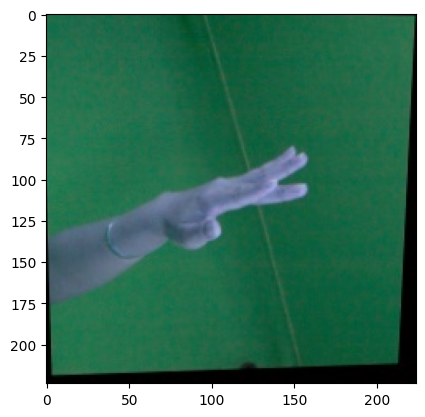

In [23]:
import cv2
from PIL import Image
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
from google.protobuf import text_format
import points_displayer
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import models
from importlib import reload

# reload(models)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file = "/home/devcontainers/third-year-project/data/freihand/left/training/rgb/00009009.jpg"
# file = "/home/devcontainers/third-year-project/data/split_F-PHAB/left/00000099.jpeg"
image = Image.open(file)

# model = models.OccModel().to(device)

# model.load_state_dict(torch.load("models/points_20240103-024547.pt"))
# model.load_state_dict(torch.load("models/points_20240104-022118.pt"))
# model = old_model
model.eval()
transform = transforms.Compose({
    # transforms.Resize((224, 224)),
    transforms.ToTensor()
})

# image.resize(224,224)

image = transform(image) / 255

joints = model(torch.stack([image]).to(device))

print(joints[0])

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles

landmarks = ""
for X, Y, Z in joints[0]:
    formatted_string = f"landmark {{x: {X} y: {Y} z: {Z}}} "
    landmarks = landmarks + formatted_string

hand_landmarks = text_format.Parse(
    landmarks,
    landmark_pb2.NormalizedLandmarkList())

# img = cv2.imread(file)
img2 = cv2.imread(file)
# img = cv2.resize(img, (224,224))
# mp_drawing.draw_landmarks(
#             img,
#             hand_landmarks,
#             mp_hands.HAND_CONNECTIONS,
#             mp_drawing_styles.get_default_hand_landmarks_style(),
#             mp_drawing_styles.get_default_hand_connections_style())
points_displayer.draw_landmarks(img2, joints.cpu().detach().numpy().tolist()[0])
# plt.imshow(img)
# plt.show()
plt.imshow(img2)
plt.show()

mp_drawing.plot_landmarks(
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS)
plt.imshow(cv2.imread(file))